<a href="https://colab.research.google.com/github/anisbagwan/Mobile-Price-Prediction-Deploy/blob/main/Mobile_Price_Range_Prediction_Deploy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing important Libraries

import pandas as pd                     # To bring data analysis tools and libraries
import numpy as np                      # To perform numerical/mathematical operation on array
import matplotlib.pyplot as plt         # For plotting data
import seaborn as sns                   # For statistical graphics

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Mount the google drive 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Importing the dataset

df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/ML Capsotne Classification/Copy of data_mobile_price_range.csv')

In [10]:
# Display information of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
# Creating a new column which gives the pixel size of the mobiles
df['px_size']=df['px_width']*df['px_height']
# Drop px_width and px_height variable
df.drop(['px_width','px_height'],inplace=True,axis=1)

In [12]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range',
       'px_size'],
      dtype='object')

In [14]:
# Drop px_width and px_height variable
df.drop(['blue','touch_screen', 'wifi','m_dep', 'n_cores', 'pc','sc_h','dual_sim', 
         'fc', 'four_g','clock_speed','sc_w', 'talk_time', 'three_g'],inplace=True,axis=1)

In [15]:
df.columns

Index(['battery_power', 'int_memory', 'mobile_wt', 'ram', 'price_range',
       'px_size'],
      dtype='object')

In [17]:
X=df[['battery_power','int_memory','mobile_wt','ram','px_size']].values

In [18]:
y=df['price_range'].values

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1) 

In [21]:
# Rescaling independent variables
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

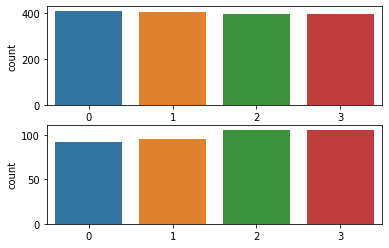

In [22]:
fig, ax =plt.subplots(2,1)
sns.countplot(y_train,ax=ax[0])
sns.countplot(y_test,ax=ax[1])
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve,roc_auc_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import metrics

In [25]:
# Create functoin to plot confusion matrix 

from sklearn.metrics import classification_report, confusion_matrix
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='flare')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

In [26]:
classifier=RandomForestClassifier(random_state=44)

In [27]:
classifier.fit(X_train, y_train)                                            # Applying Model

RandomForestClassifier(random_state=44)

In [29]:
y_pred = classifier.predict(X_test)                                         # Storing the predicted values in y_pred variable
X_pred = classifier.predict(X_train)

In [30]:
accuracy_score(y_test, y_pred)

0.89

In [31]:
accuracy_score(y_train, X_pred)

1.0